Dataset: California Housing (Real-world data from 1990 California census)
Number of samples: 20640
Number of features: 8
Feature columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


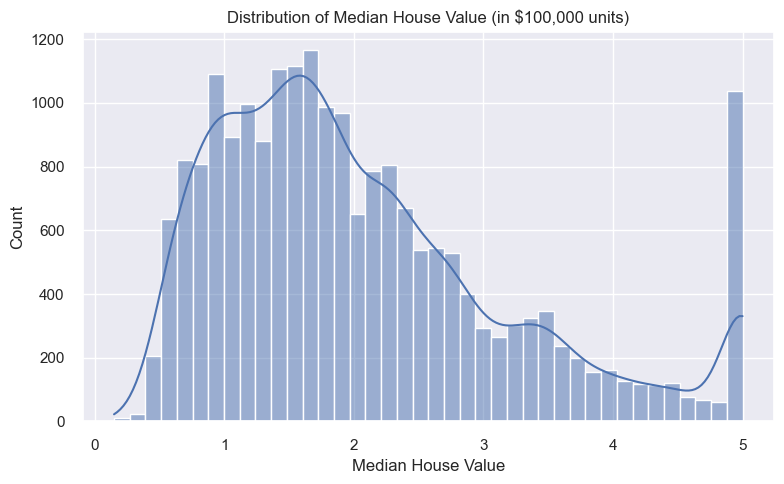

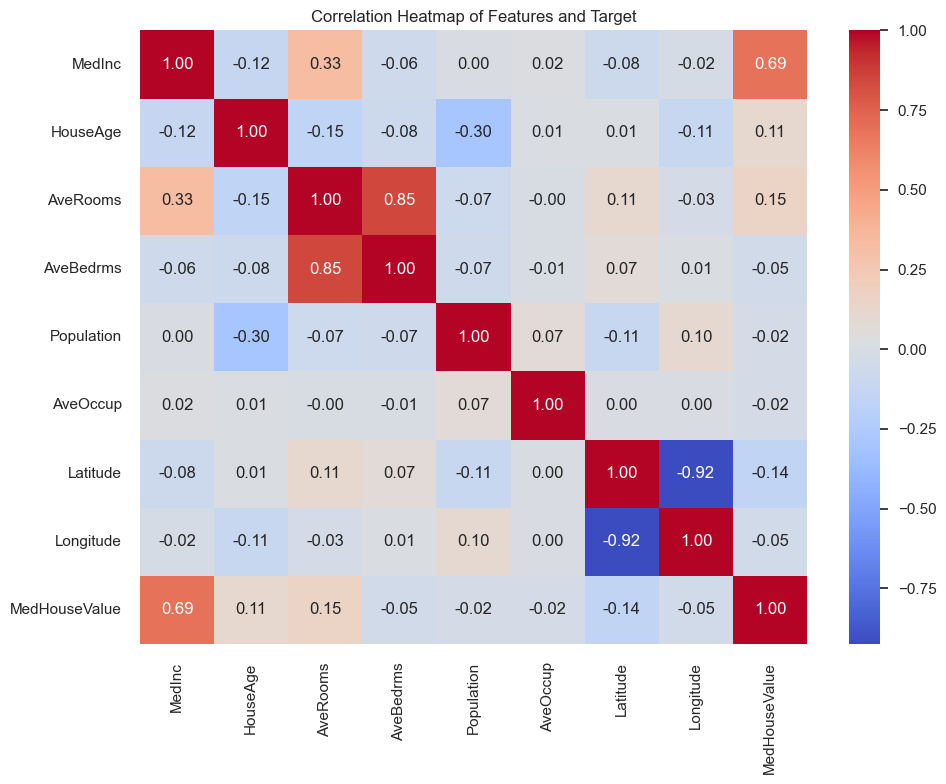

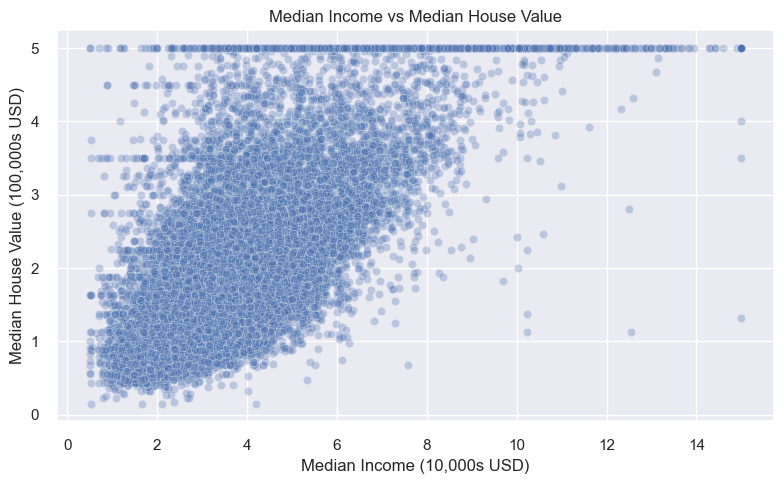


Training data shape: (16512, 8)
Testing data shape: (4128, 8)

Model Performance (Linear Regression on California Housing):
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R² Score: 0.5758


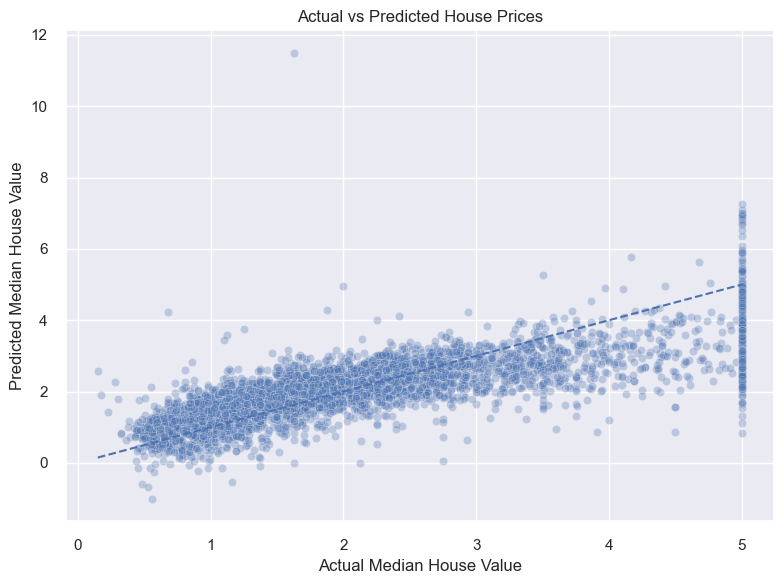

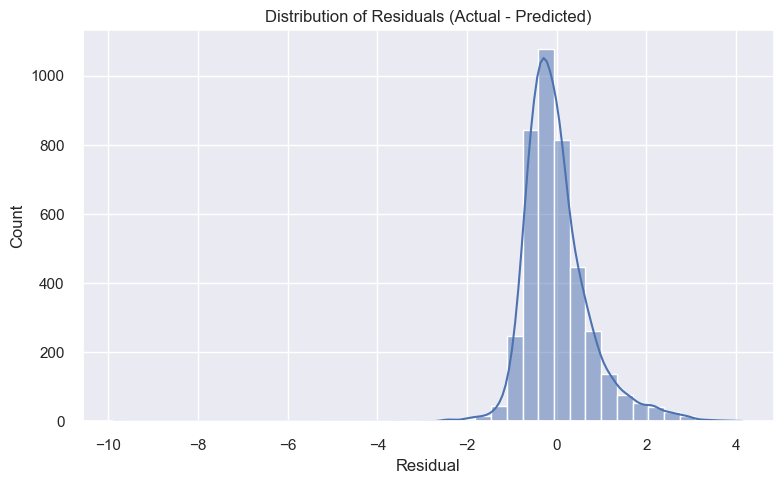

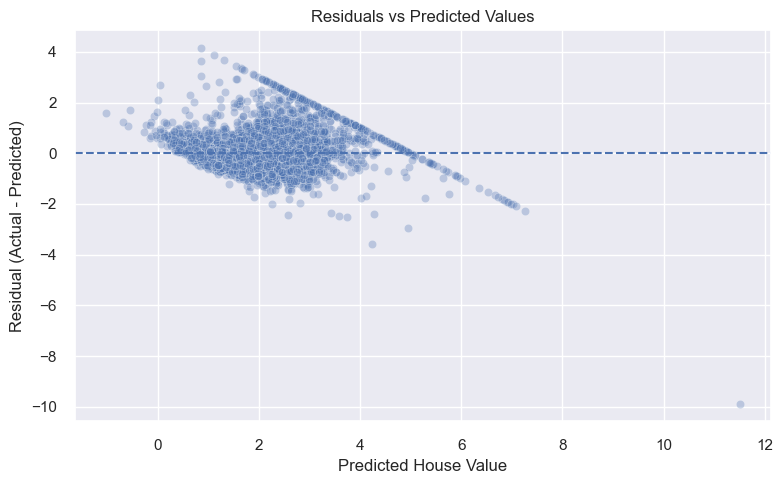


Sample input features (one house):
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   

       Longitude  
20046    -119.01  

Actual house value: 0.4770 (in 100,000 USD)
Predicted house value: 0.7191 (in 100,000 USD)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


plt.style.use("seaborn-v0_8")
sns.set()


california = fetch_california_housing(as_frame=True)

# Features (X) and Target (y)
X = california.data
y = california.target  # MedHouseValue in 100,000 USD

print("Dataset: California Housing (Real-world data from 1990 California census)")
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Feature columns:", list(X.columns))

# Combine into one DataFrame for EDA
df = X.copy()
df["MedHouseValue"] = y

print("\nFirst 5 rows of the dataset:")
print(df.head())



# 3.1 Distribution of Target (House Prices)
plt.figure(figsize=(8, 5))
sns.histplot(df["MedHouseValue"], bins=40, kde=True)
plt.title("Distribution of Median House Value (in $100,000 units)")
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3.2 Correlation Heatmap (Top Features)
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features and Target")
plt.tight_layout()
plt.show()

# 3.3 Relationship: Median Income vs House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseValue"], alpha=0.3)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income (10,000s USD)")
plt.ylabel("Median House Value (100,000s USD)")
plt.tight_layout()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance (Linear Regression on California Housing):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")  # ideal line
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.tight_layout()
plt.show()


residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Distribution of Residuals (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted House Value")
plt.ylabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()


sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
sample_pred = model.predict(sample_scaled)

print("\nSample input features (one house):")
print(sample)
print(f"\nActual house value: {y_test.iloc[0]:.4f} (in 100,000 USD)")
print(f"Predicted house value: {sample_pred[0]:.4f} (in 100,000 USD)")
